#Face-Recognition

##Installation and handling data

In this section we will import the required dependencies and import the data and split it as required.We will show some classes (subjects) of the data. By the end of this section the data would be ready for the next section.

In [ ]:
%%capture
%matplotlib inline
# Clonning the data
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! kaggle datasets download -d kasikrit/att-database-of-faces
! unzip /content/att-database-of-faces.zip ;
! rm /content/att-database-of-faces.zip

# Importing libraries
import numpy as np
import PIL
from sklearn import metrics
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray

In [ ]:
# Creating the Data matrix and the labels
list_of_vectors = list()
for subject in range(1,41):
  vectors = list()
  for image in range(1,11):
    image = Image.open(f'/content/s{subject}/{image}.pgm')
    data = asarray(image).reshape(1,-1)
    vectors.append(data)
  list_of_vectors.append(vectors)
D = np.stack(list_of_vectors,axis = 0).reshape((400,-1))
Y = np.array([x for x in range(1,41) for j in range(10)]).reshape(-1,1)
print(D.shape)
print(Y.shape)
print(D)

(400, 10304)
(400, 1)
[[ 48  49  45 ...  47  46  46]
 [ 60  60  62 ...  32  34  34]
 [ 39  44  53 ...  29  26  29]
 ...
 [125 119 124 ...  36  39  40]
 [119 120 120 ...  89  94  85]
 [125 124 124 ...  36  35  34]]


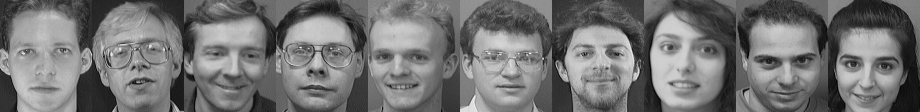

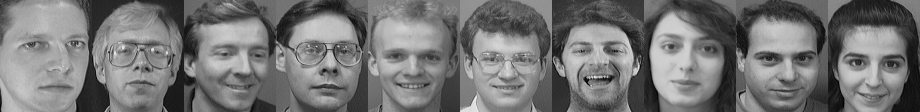

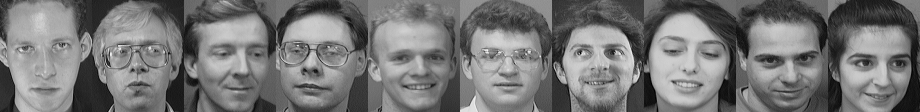

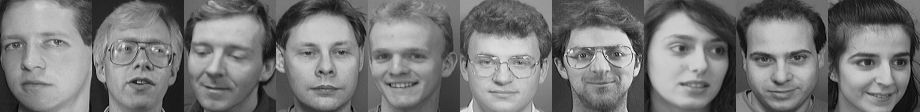

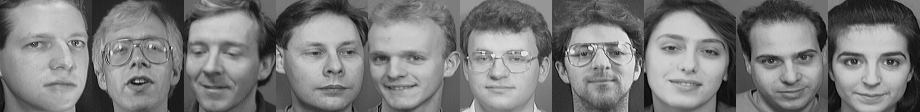

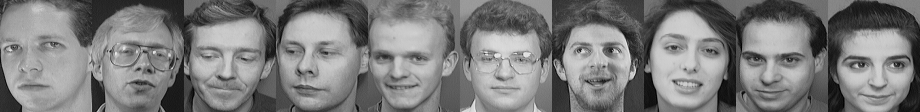

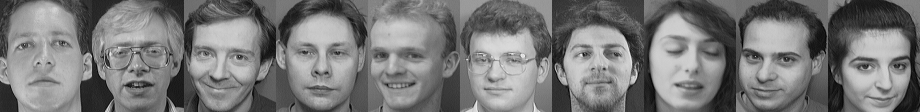

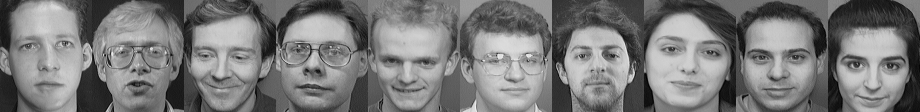

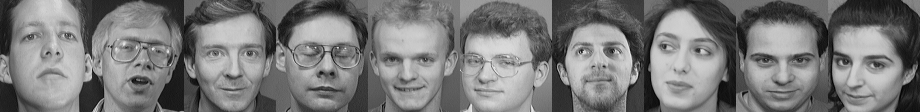

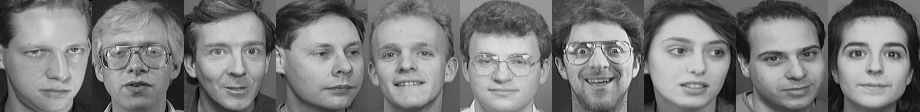

In [ ]:
# Displaying some of the subjects
for i in range(10):
    img = PIL.Image.fromarray(np.concatenate((
        D[i].reshape(-1,92),D[i+10].reshape(-1,92),D[i+20].reshape(-1,92),D[i+30].reshape(-1,92),
        D[i+40].reshape(-1,92),D[i+50].reshape(-1,92),D[i+60].reshape(-1,92),D[i+70].reshape(-1,92),
        D[i+80].reshape(-1,92),D[i+90].reshape(-1,92)
        ),axis = 1).reshape(112,-1).astype('uint8'))
    display(img)

In [ ]:
# Splitting data
training_data = list()
training_labels = list()
test_data = list()
test_labels = list()
for i in range(400):
  if i%2 == 0:
    training_data.append(D[i])
    training_labels.append(Y[i])
  else :
    test_data.append(D[i])
    test_labels.append(Y[i])
D_train = np.array(training_data)
Y_train = np.array(training_labels)
D_test = np.array(test_data)
Y_test = np.array(test_labels)
print(f'Training data shape : {D_train.shape} || Training data labels shape : {Y_train.shape}')
print(f'Test data shape : {D_test.shape} || Test data labels shape : {Y_test.shape}')

Training data shape : (200, 10304) || Training data labels shape : (200, 1)
Test data shape : (200, 10304) || Test data labels shape : (200, 1)


Visualizing the training data and test data:

[1]	    [2]	    [3]		    [4]		    [5]	    [6]


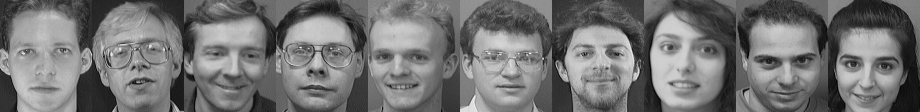

[1]	    [2]	    [3]		    [4]		    [5]	    [6]


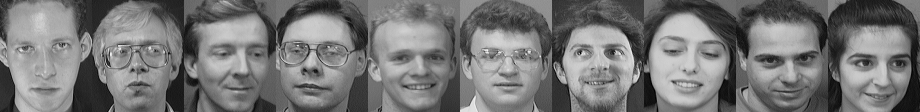

[1]	    [2]	    [3]		    [4]		    [5]	    [6]


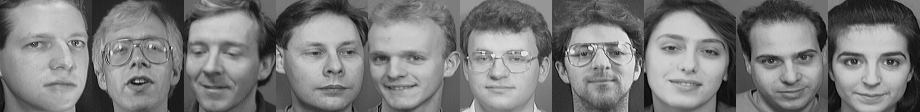

[1]	    [2]	    [3]		    [4]		    [5]	    [6]


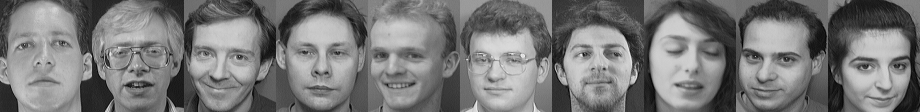

[1]	    [2]	    [3]		    [4]		    [5]	    [6]


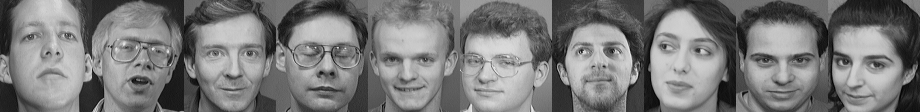

In [ ]:
for i in range(5):
    img = PIL.Image.fromarray(np.concatenate((
        D_train[i].reshape(-1,92),D_train[i+5].reshape(-1,92),D_train[i+10].reshape(-1,92),D_train[i+15].reshape(-1,92),
        D_train[i+20].reshape(-1,92),D_train[i+25].reshape(-1,92),D_train[i+30].reshape(-1,92),D_train[i+35].reshape(-1,92),
        D_train[i+40].reshape(-1,92),D_train[i+45].reshape(-1,92)
        ),axis = 1).reshape(112,-1).astype('uint8'))
    print(f'{Y_train[i]}\t    {Y_train[i+5]}\t    {Y_train[i+10]}\t\t    {Y_train[i+15]}\t\t    {Y_train[i+20]}\t    {Y_train[i+25]}')
    display(img)

[1]	    [2]	    [3]		    [4]		    [5]	    [6]


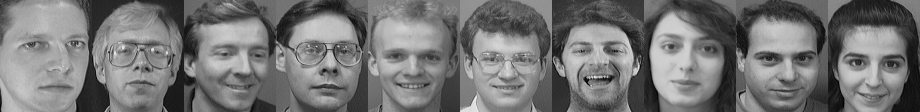

[1]	    [2]	    [3]		    [4]		    [5]	    [6]


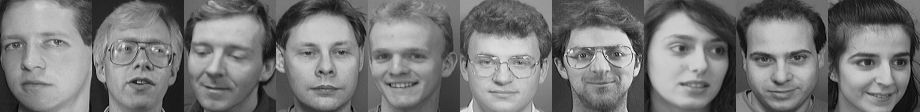

[1]	    [2]	    [3]		    [4]		    [5]	    [6]


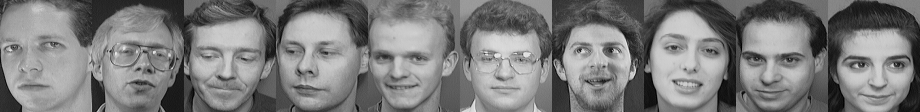

[1]	    [2]	    [3]		    [4]		    [5]	    [6]


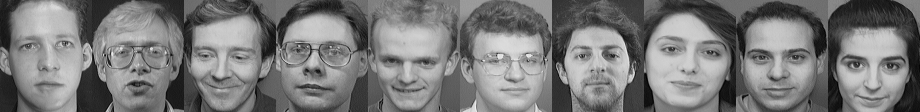

[1]	    [2]	    [3]		    [4]		    [5]	    [6]


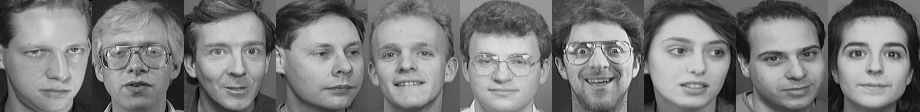

In [ ]:
for i in range(5):
    img = PIL.Image.fromarray(np.concatenate((
        D_test[i].reshape(-1,92),D_test[i+5].reshape(-1,92),D_test[i+10].reshape(-1,92),D_test[i+15].reshape(-1,92),
        D_test[i+20].reshape(-1,92),D_test[i+25].reshape(-1,92),D_test[i+30].reshape(-1,92),D_test[i+35].reshape(-1,92),
        D_test[i+40].reshape(-1,92),D_test[i+45].reshape(-1,92)
        ),axis = 1).reshape(112,-1).astype('uint8'))
    print(f'{Y_test[i]}\t    {Y_test[i+5]}\t    {Y_test[i+10]}\t\t    {Y_test[i+15]}\t\t    {Y_test[i+20]}\t    {Y_test[i+25]}')
    display(img)

## PCA

In [ ]:
# This function returns the eigen values and eigen vectors after centralizing the data and sorting them descendingly
def get_eigen(D):
  mean_vector = np.mean(D_train,axis = 0).reshape((-1,1)).T
  Z = D_train-mean_vector
  cov = (1/Z.shape[0])*np.dot(Z.T,Z)
  eigen_values ,eigen_vectors = np.linalg.eigh(cov)
  idx = eigen_values.argsort()[::-1] # returns the indeces soreted in desending order
  eigen_values = eigen_values[idx]
  eigen_vectors = eigen_vectors[:,idx]
  eigen_vectors = np.real(eigen_vectors)
  return eigen_values,eigen_vectors

In [ ]:
# This function returns the projection matrix using the eigen values and vectors from the previous function and for some alpha
def get_projection(eigen_values,eigen_vectors,alpha):
  total_sum = np.sum(eigen_values)
  current_sum = 0
  r = -1
  while(current_sum/total_sum < alpha):
    r+=1
    current_sum+=eigen_values[r]
  if (r+1)==eigen_vectors.shape[0]:
    r-=1
  return eigen_vectors[:,:(r+1)]

In [ ]:
# Getting eigen_values and vectors
eigen_values,eigen_vectors = get_eigen(D_train)

In [ ]:
# Getting projection matrices for all alpha
alpha=[0.7,0.725,0.75,0.775,0.8,0.825,0.85,0.875,0.9,0.925,0.95,0.975]
#alpha=[0.8,0.825,0.85,0.875,0.9,0.925,0.95]
projection_matrices = list()
for a in alpha:
  projection_matrices.append(get_projection(eigen_values,eigen_vectors,a))

In [ ]:
#projection of training and test data
projected_training_data=[]
projected_test_data=[]
for i in projection_matrices:
  projected_training_data.append(D_train.dot(i))
  projected_test_data.append(D_test.dot(i))
print("Trainig data")
for i in projected_training_data:
  print(i.shape)
print("Test data")
for i in projected_test_data:
  print(i.shape)

Trainig data
(200, 18)
(200, 21)
(200, 25)
(200, 30)
(200, 36)
(200, 43)
(200, 51)
(200, 62)
(200, 76)
(200, 93)
(200, 115)
(200, 147)
Test data
(200, 18)
(200, 21)
(200, 25)
(200, 30)
(200, 36)
(200, 43)
(200, 51)
(200, 62)
(200, 76)
(200, 93)
(200, 115)
(200, 147)


In [ ]:
#transform data from numpy.array to dataframe
df_train_labels=pd.DataFrame(Y_train,columns=["class"])
df_test_labels=pd.DataFrame(Y_test,columns=["class"])
df_train=[]
df_test=[]
columns_vectors=[]

for i in projected_training_data:
   columns_vectors.append((["PC"+str(x+1) for x in range(len(i[0]))]))
print(columns_vectors)
for i in range(len(projected_training_data)):
    df_test.append(pd.DataFrame(projected_test_data[i], columns =columns_vectors[i]))
    df_train.append(pd.DataFrame(projected_training_data[i], columns =columns_vectors[i]))

[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18'], ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21'], ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25'], ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30'], ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC

In [ ]:
# classify data using (first Nearest Neighbor to determine the class labels)
all_accuracies=[]
for k in  (1,3,5,7):
      accuracies=[]
      print("For "+str(k)+" n_neighbors")
      for test,train,a in zip(df_test,df_train,alpha):
          # make our model
          knn= KNeighborsClassifier(n_neighbors=k);
          # Train the model
          knn.fit(train, df_train_labels.values.ravel());
          # predict the labels 
          labels_pred = knn.predict(test)
          accuracies.append(metrics.accuracy_score(df_test_labels,labels_pred))
          print("Accuracy with alpha("+str(a)+") = ",metrics.accuracy_score(df_test_labels,labels_pred))
          #print("classification report:")
          #print(metrics.classification_report(df_test_labels, labels_pred))
      all_accuracies.append(accuracies)
      print("--------------------------------------------------------\n")

For 1 n_neighbors
Accuracy with alpha(0.7) =  0.935
Accuracy with alpha(0.725) =  0.94
Accuracy with alpha(0.75) =  0.94
Accuracy with alpha(0.775) =  0.945
Accuracy with alpha(0.8) =  0.95
Accuracy with alpha(0.825) =  0.95
Accuracy with alpha(0.85) =  0.95
Accuracy with alpha(0.875) =  0.945
Accuracy with alpha(0.9) =  0.94
Accuracy with alpha(0.925) =  0.94
Accuracy with alpha(0.95) =  0.94
Accuracy with alpha(0.975) =  0.94
--------------------------------------------------------

For 3 n_neighbors
Accuracy with alpha(0.7) =  0.865
Accuracy with alpha(0.725) =  0.885
Accuracy with alpha(0.75) =  0.89
Accuracy with alpha(0.775) =  0.895
Accuracy with alpha(0.8) =  0.895
Accuracy with alpha(0.825) =  0.89
Accuracy with alpha(0.85) =  0.895
Accuracy with alpha(0.875) =  0.895
Accuracy with alpha(0.9) =  0.89
Accuracy with alpha(0.925) =  0.89
Accuracy with alpha(0.95) =  0.895
Accuracy with alpha(0.975) =  0.895
--------------------------------------------------------

For 5 n_neighbo

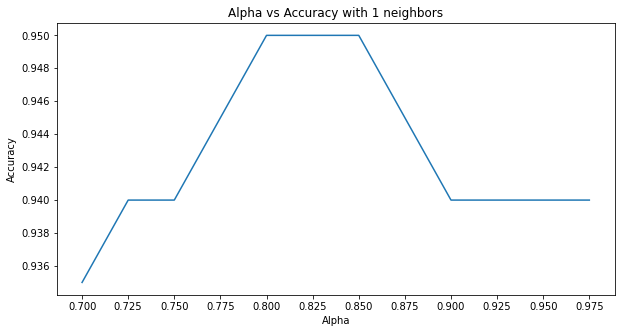

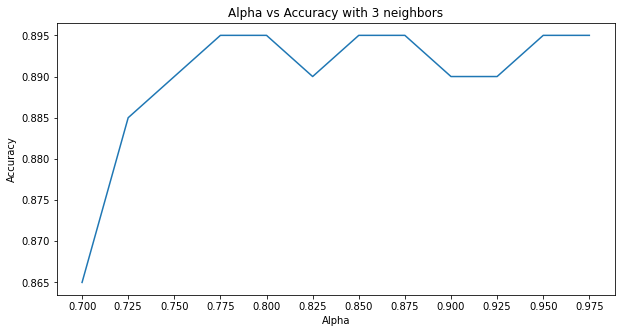

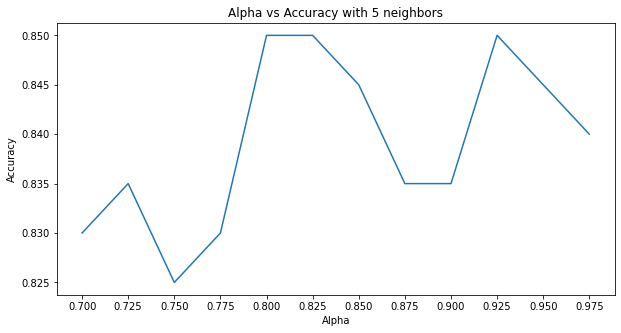

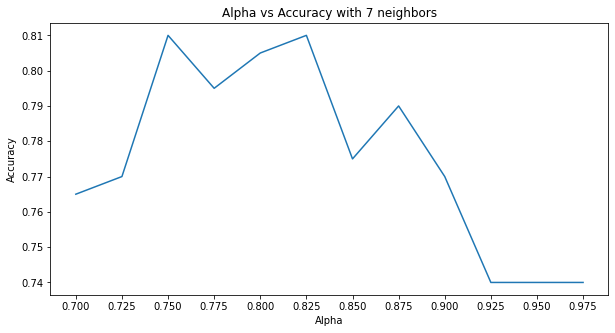

In [ ]:
for accuracies,k in zip(all_accuracies,(1,3,5,7)):
    plt.figure(figsize=(10,5));
    plt.plot(alpha,accuracies);
    plt.title("Alpha vs Accuracy with "+str(k)+" neighbors")
    plt.xlabel("Alpha")
    plt.ylabel("Accuracy");
    plt.xticks(alpha)
    plt.grid(False)

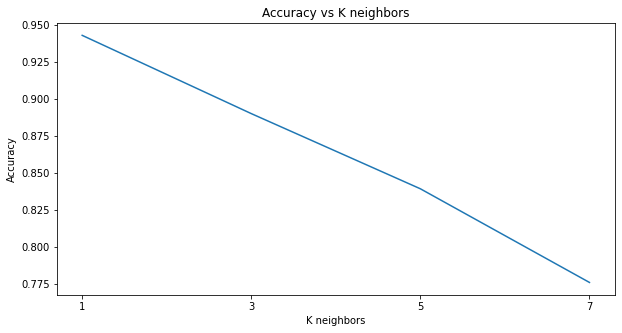

In [ ]:
#plot accuracy vs k_neighbors
mean=np.mean(all_accuracies,axis=1)
plt.figure(figsize=(10,5));
k=[1,3,5,7]
plt.plot(k,mean);
plt.title("Accuracy vs K neighbors")
plt.xlabel("K neighbors")
plt.ylabel("Accuracy");
plt.xticks(k)
plt.grid(False)

get the images in the lower dimention (the eigen face using the choosen
 eigen vectors)

(10304, 40)


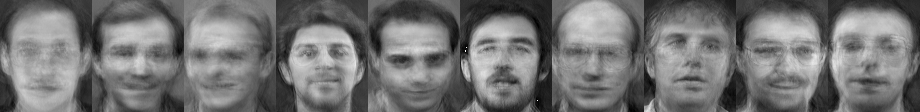

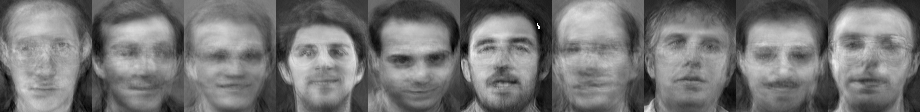

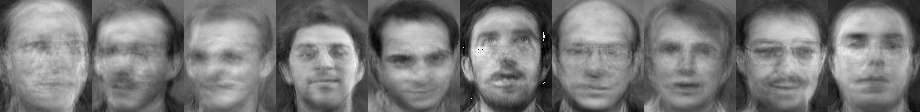

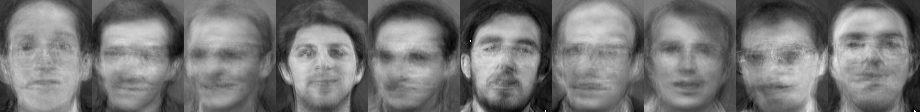

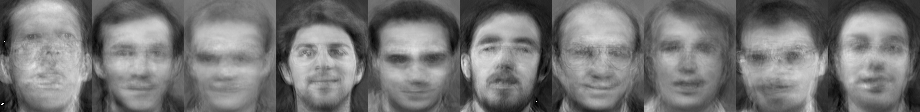

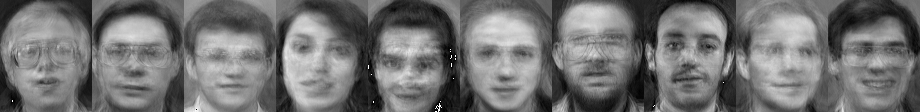

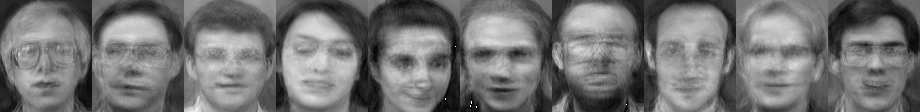

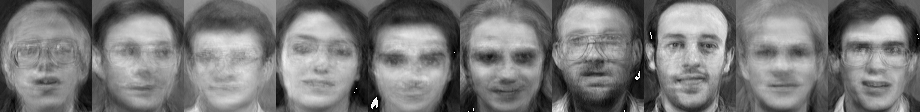

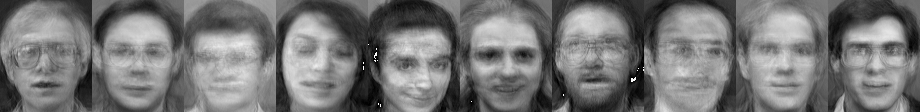

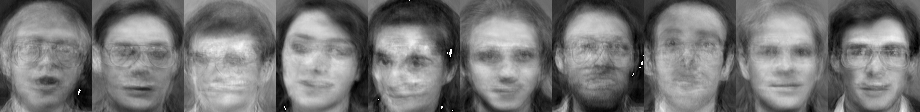

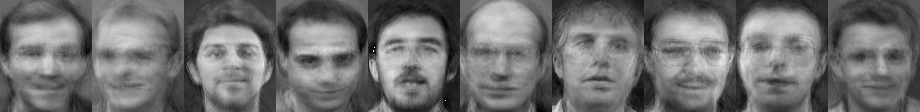

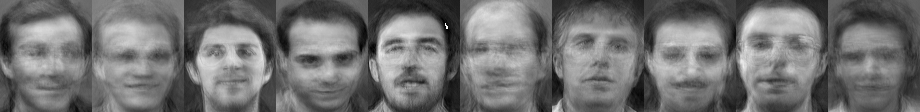

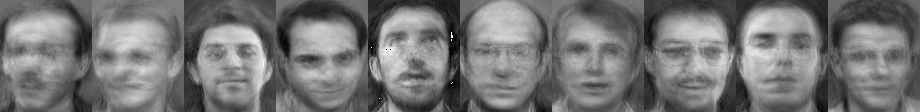

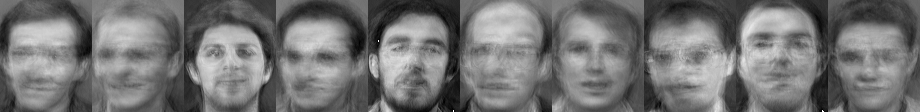

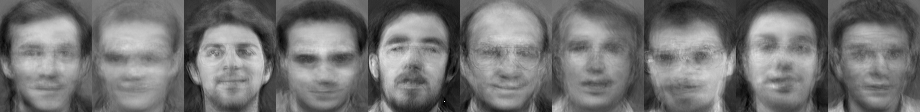

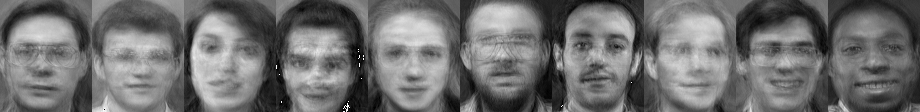

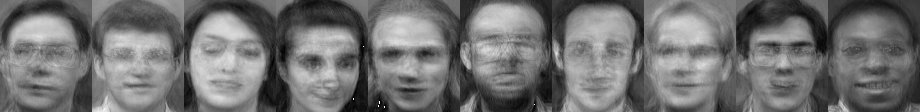

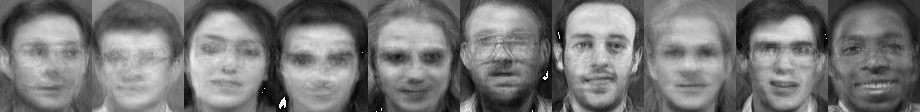

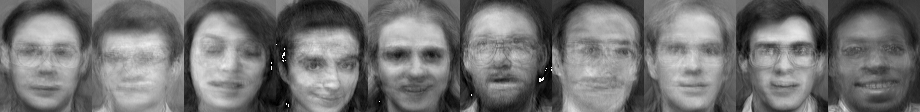

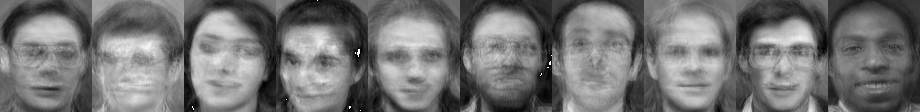

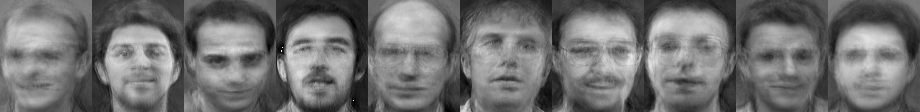

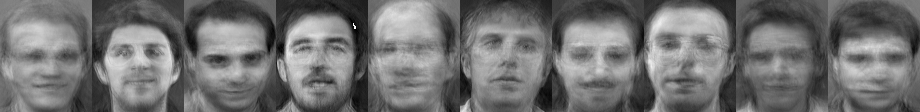

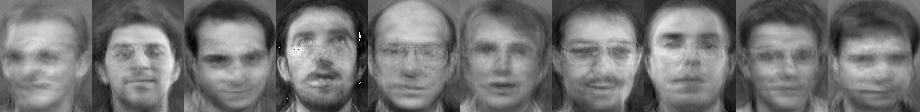

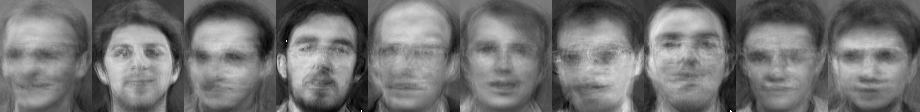

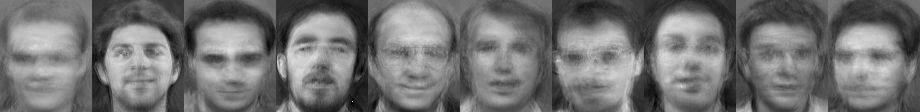

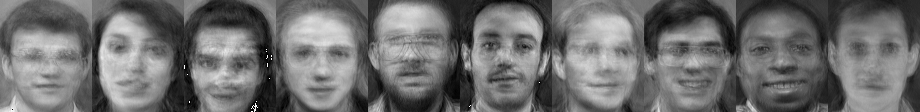

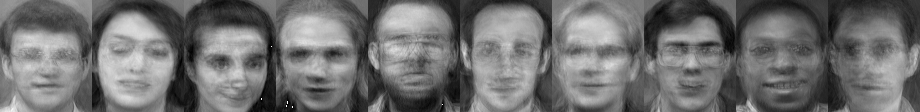

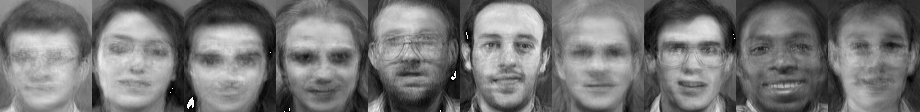

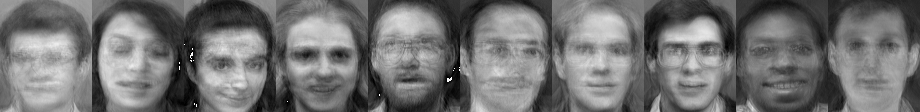

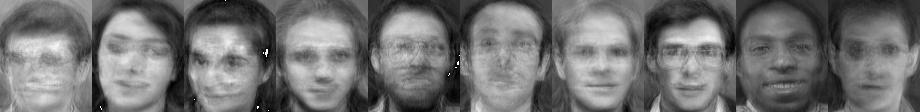

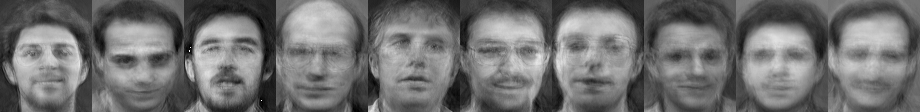

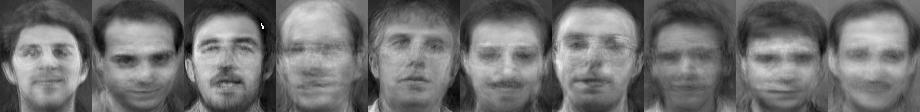

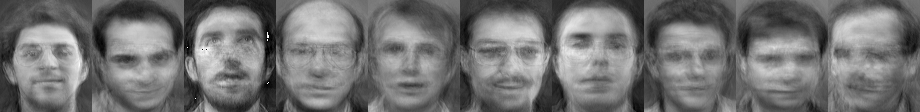

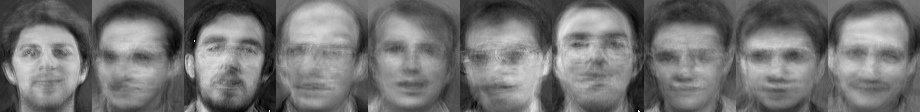

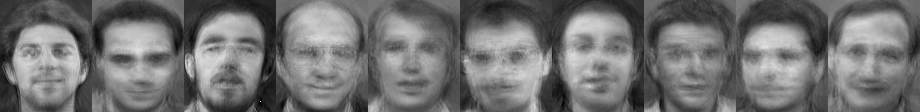

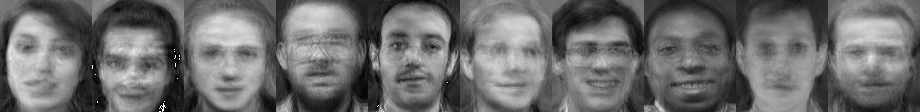

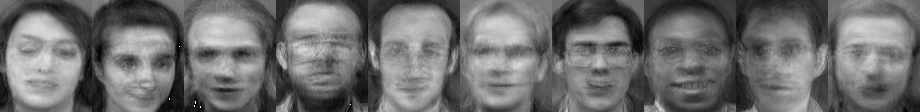

In [ ]:
mean_vector = np.mean(D_train,axis = 0).reshape((-1,1)).T
Z = D_train-mean_vector
p = projection_matrices[11][:,0:40]
eigen_vectors=projection_matrices[11][:,0:100]
print(p.shape)
A = np.dot(Z,p)
Z_new = np.dot(A,p.T)
Z_new=Z_new+mean_vector

##show_image(Z_new[0])
for i in range(37):
  img = PIL.Image.fromarray(np.concatenate((
      Z_new[i].reshape(-1,92),Z_new[i+10].reshape(-1,92),Z_new[i+20].reshape(-1,92),Z_new[i+30].reshape(-1,92),
      Z_new[i+40].reshape(-1,92),Z_new[i+50].reshape(-1,92),Z_new[i+60].reshape(-1,92),Z_new[i+70].reshape(-1,92),
      Z_new[i+80].reshape(-1,92),Z_new[i+90].reshape(-1,92)
      ),axis = 1).reshape(112,-1).astype('uint8'))
  display(img.convert("L"))

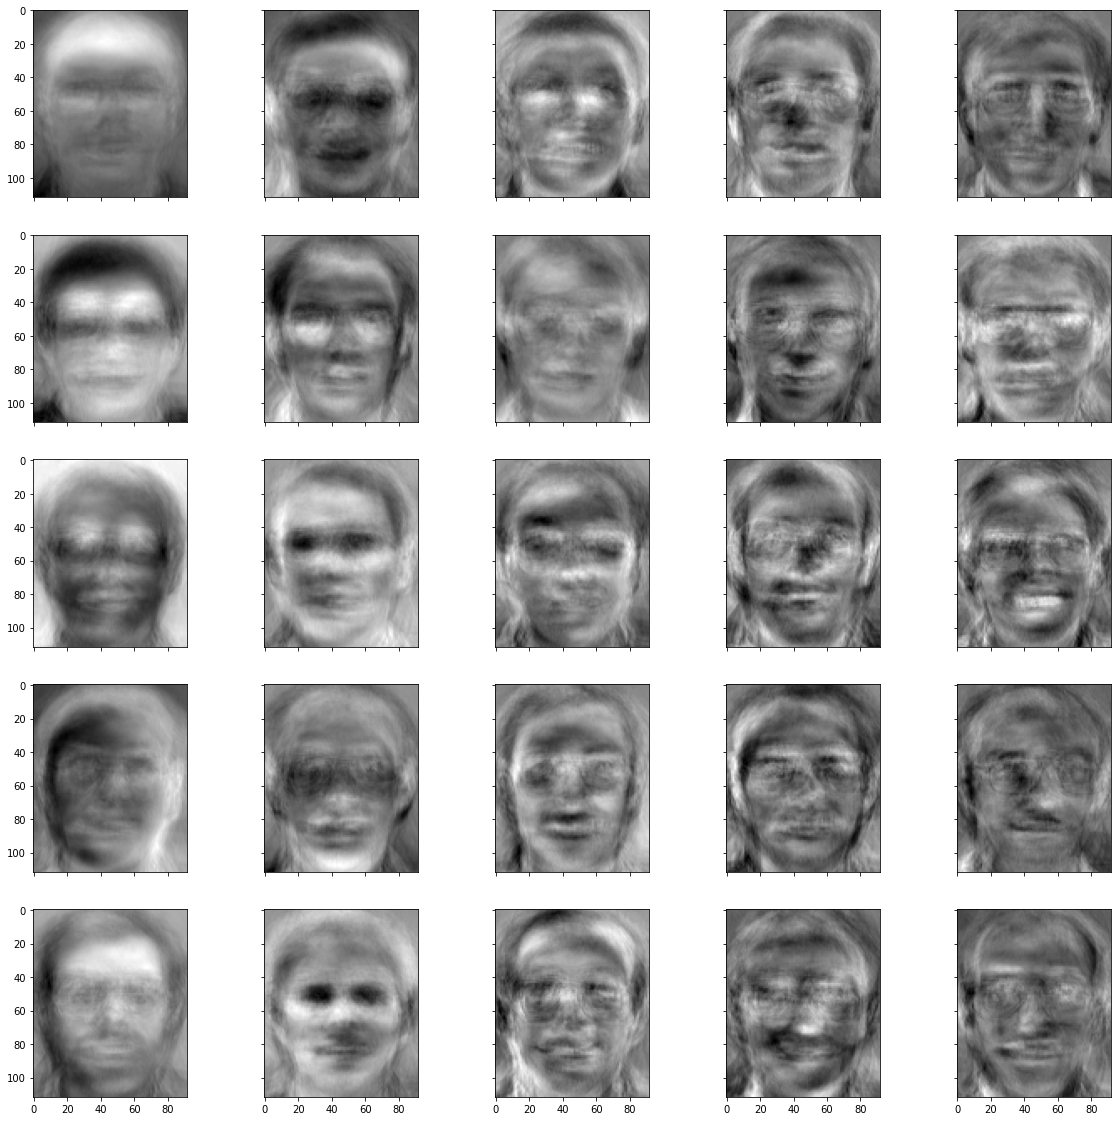

In [ ]:
# Show the first 16 eigenfaces
fig, axes = plt.subplots(5,5,sharex=True,sharey=True,figsize=(20,20))
for i in range(25):
    axes[i%5][i//5].imshow(eigen_vectors[:,i].reshape(112, 92), cmap="gray")
plt.show()

## LDA
 Classification Using LDA

In [ ]:
# This function returns the eigen vectors and eigen values of the LDA decomposition
def LDA():
  # Calculating the means
  overall_mean = np.mean(D_train,axis=0,keepdims=True).T
  class_means = list()
  for i in range(40):
    D_i = D_train[i*5:(i*5)+5]
    class_means.append(np.mean(D_i,axis=0,keepdims=True))
  class_means = np.array(class_means).squeeze()

  # Calculating B matrix
  B = np.zeros((D.shape[1],D.shape[1]))
  for i in range(40):
    diff_vector = class_means[i].reshape((-1,1)) - overall_mean
    B += np.dot(diff_vector,diff_vector.T)
  B *= 5

  # Calculating S matrix
  S = np.zeros((D.shape[1],D.shape[1]))
  for i in range(40):
    Z = D_train[i*5:(i*5)+5] - class_means[i]
    S += np.dot(Z.T,Z)

  # Getting the eigen values and vectors and sorting them
  eigen_values ,eigen_vectors = np.linalg.eigh(np.dot(np.linalg.inv(S),B))
  idx = eigen_values.argsort()[::-1] # returns the indeces soreted in desending order
  eigen_values = eigen_values[idx]
  eigen_vectors = eigen_vectors[:,idx]
  return eigen_values,eigen_vectors

In [ ]:
eigen_values,eigen_vectors = LDA()

In [ ]:
def accuracy_graph(accuracy):
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 8), np.array(accuracy), color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
    plt.ylim(70, 100)
    plt.title('Accuracy for each K Value')
    plt.xlabel('K Value')
    plt.ylabel('Accuracy %')

Accuracy with =  0.95
--------------------------------------------------------

Accuracy with =  0.89
--------------------------------------------------------

Accuracy with =  0.865
--------------------------------------------------------

Accuracy with =  0.84
--------------------------------------------------------

Accuracy with =  0.81
--------------------------------------------------------

Accuracy with =  0.77
--------------------------------------------------------

Accuracy with =  0.77
--------------------------------------------------------



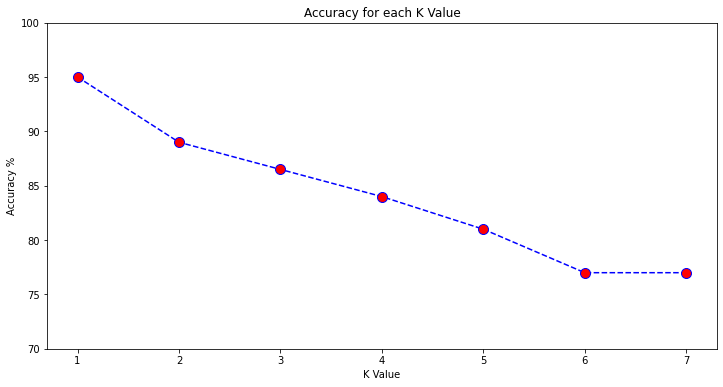

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

D_train_reductuted = np.dot(D_train,projection_matrix)
D_test_reductuted = np.dot(D_test,projection_matrix)

accuracy = list()
for i in range(1, 8):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(D_train_reductuted, np.ravel(Y_train))

    test_predict = classifier.predict(D_test_reductuted)
    
    acuuracy_measured = metrics.accuracy_score(Y_test,test_predict)
    print("Accuracy with = ",acuuracy_measured)
    print("--------------------------------------------------------\n")

    accuracy.append(acuuracy_measured)

accuracy_graph(accuracy)

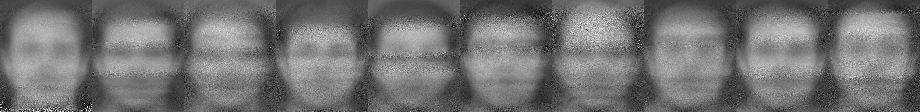

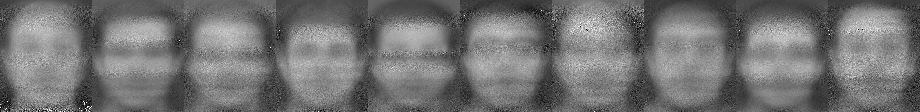

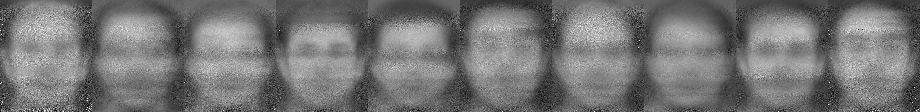

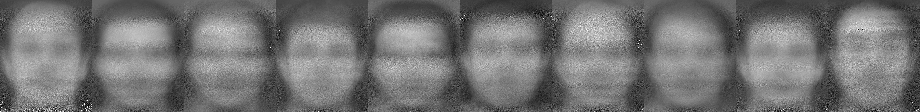

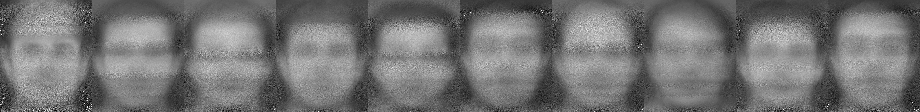

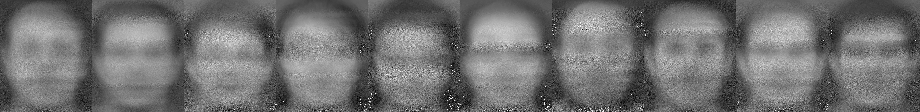

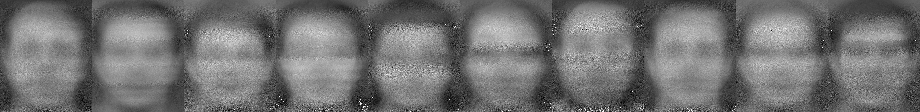

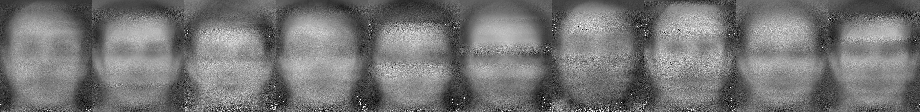

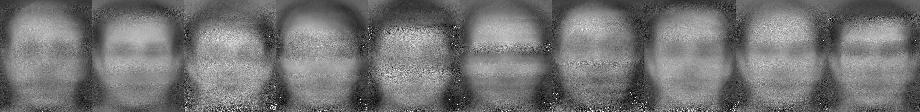

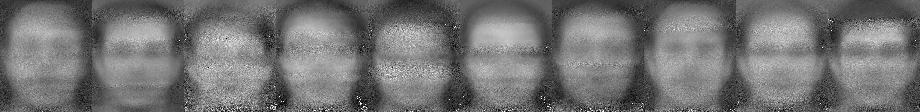

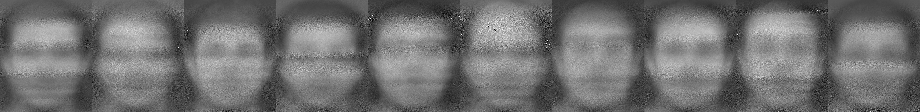

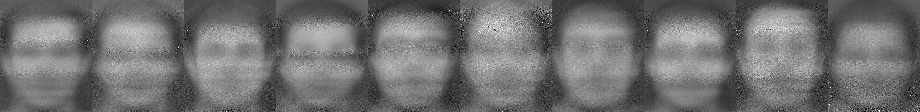

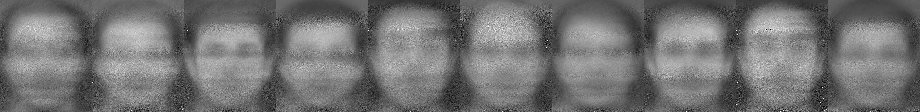

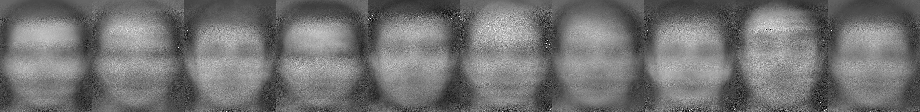

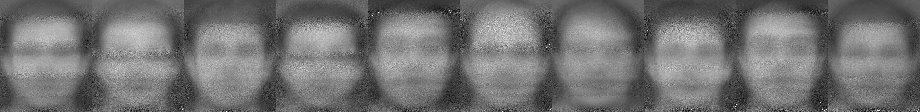

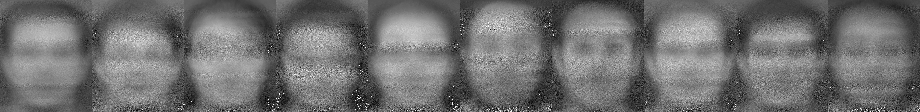

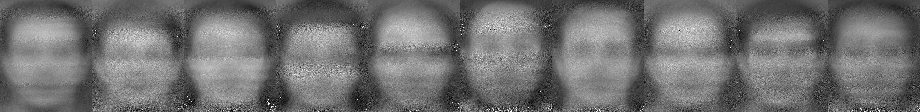

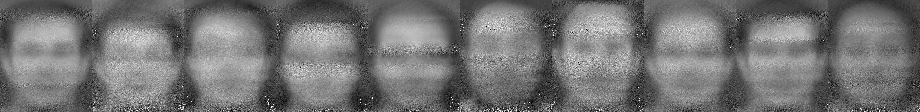

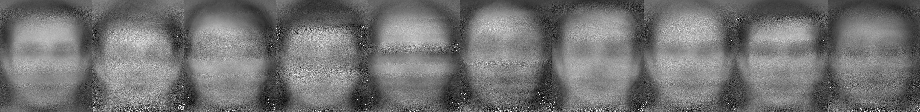

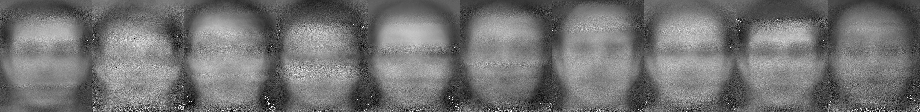

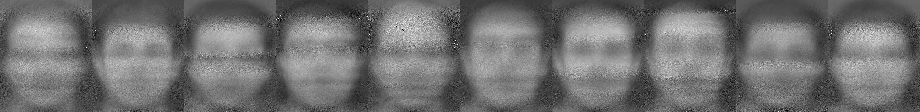

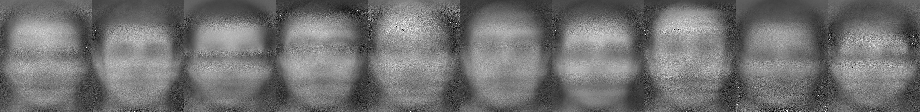

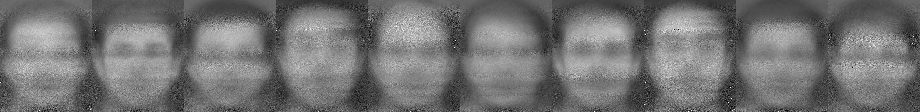

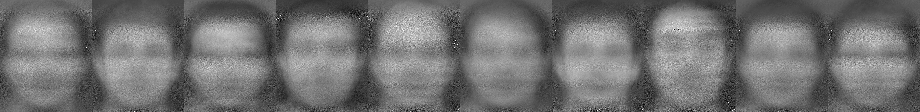

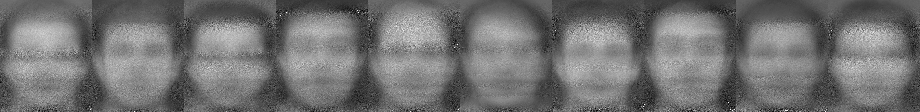

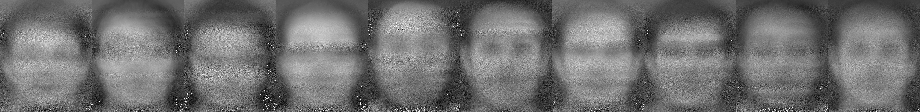

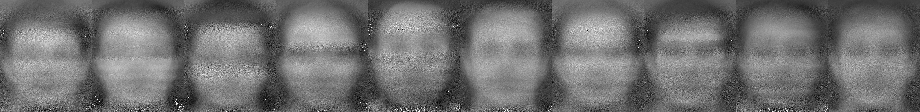

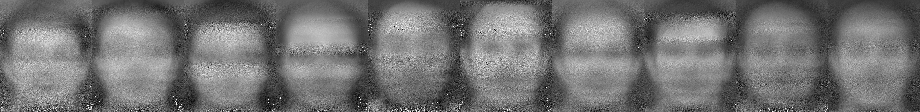

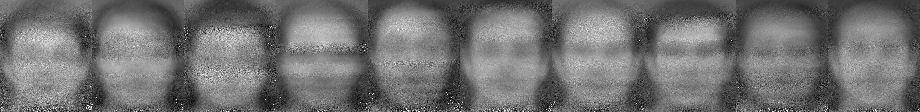

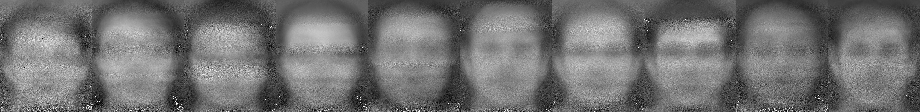

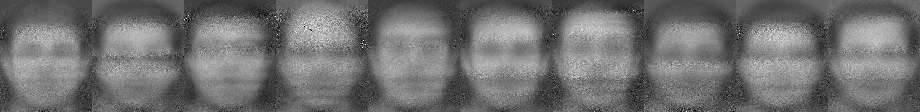

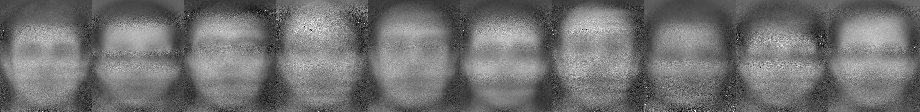

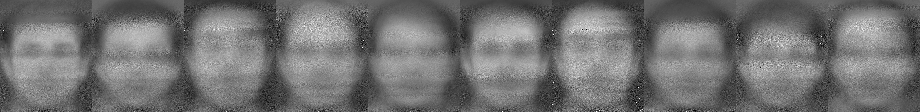

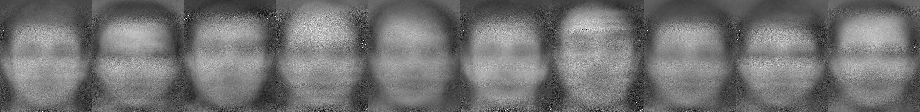

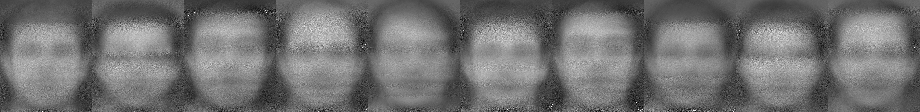

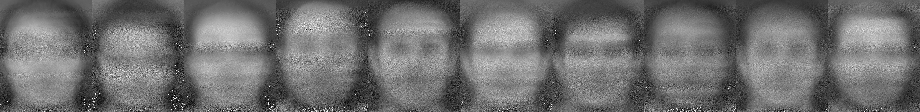

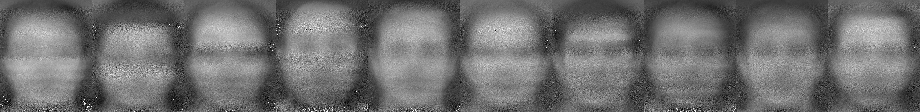

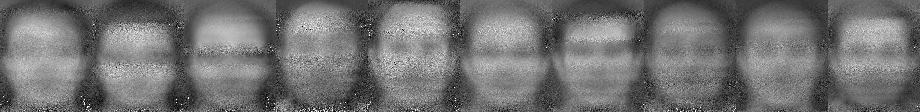

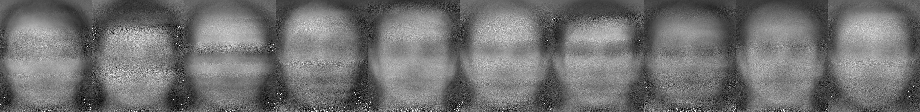

In [ ]:
mean_vector = np.mean(D_train,axis = 0).reshape((-1,1)).T
Z = D_train-mean_vector
p = e_vecs[:,0:30]
A = np.dot(Z,p)
Z_new = np.dot(A,p.T)
Z_new=Z_new+mean_vector
##show_image(Z_new[0])
for i in range(e_vecs.shape[1]):
  img = PIL.Image.fromarray(np.concatenate((
      Z_new[i].reshape(-1,92),Z_new[i+10].reshape(-1,92),Z_new[i+20].reshape(-1,92),Z_new[i+30].reshape(-1,92),
      Z_new[i+40].reshape(-1,92),Z_new[i+50].reshape(-1,92),Z_new[i+60].reshape(-1,92),Z_new[i+70].reshape(-1,92),
      Z_new[i+80].reshape(-1,92),Z_new[i+90].reshape(-1,92)
      ),axis = 1).reshape(112,-1).astype('uint8'))
  display(img.convert("L"))